# This notebook demonstrates basic machine learning concepts

Please fill in the codes between the ### START CODE HERE ### and ### END CODE HERE ### comments

##### Installing XGBoost and graphviz, uncomment it if you haven't do it

In [ ]:
!pip install xgboost graphviz

In [ ]:
!pip install bayesian-optimization

  Stored in directory: /root/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization


##### Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from datetime import datetime #for calculating running time

##### Uncomment this cell if you are using colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
cd /content/drive/My Drive/workshop/python

/content/drive/My Drive/workshop/python


In [ ]:
ls

'Basic Python for Business Students.pdf'   Mall_Customers.csv
'Basic Python.gslides'                     pystacknet/
'Basic Python.pptx'                       'Python(Lesson1).gslides'
'CB_Python(Lesson2).pdf'                  'Python(Lesson2).gslides'
 credit_card.ipynb                        'Python(lesson3).gslides'
'credit_card(Student_version).ipynb'      'Python(lesson4).gslides'
'credit_card(Teacher_version).ipynb'       UCI_Credit_Card.csv
 finance_distress.ipynb                    Untitled0.ipynb
 Financial_Distress.csv                    xgb.jpg


# Default of Credit Card Clients Dataset

**Data sources**

**Google drive:** https://drive.google.com/file/d/1E5p9qQK8E3kemMBnGpC4RLSMOUr5RliY/view?usp=sharing

**Kaggle:** https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/home

**UCI machine learning repository:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

----------------------------------

**Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content**

**There are 25 variables:**

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

# Setting the random seed and reading the data

In [ ]:
RAND_SEED = 41
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exploratory data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64


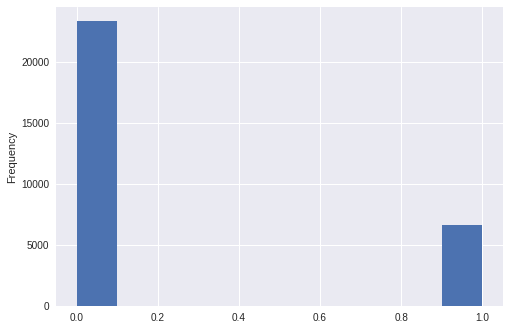

In [ ]:
print(df['default.payment.next.month'].value_counts(normalize=True))
df['default.payment.next.month'].plot(kind='hist')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


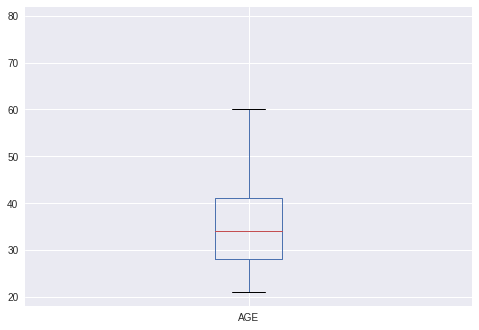

In [ ]:
df['AGE'].plot(kind='box')

# Train test split

In [ ]:
### START CODE HERE ### (1~2 lines)
x_train, x_test, y_train, y_test = train_test_split(
                                                    df.drop(['ID','default.payment.next.month'],axis=1),
                                                    df[['default.payment.next.month']],
                                                    test_size=0.3,
                                                    random_state=RAND_SEED
                                                   ) #call the train_test_split() function
### END CODE HERE ###

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [ ]:
x_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8215,450000.0,1.0,3.0,1.0,42.0,2.0,0.0,0.0,0.0,0.0,0.0,152652.0,128708.0,100429.0,77069.0,63851.0,36877.0,7032.0,3003.0,10000.0,11000.0,3000.0,58000.0
18620,20000.0,2.0,1.0,2.0,26.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1000.0,8930.0,0.0,0.0,0.0,790.0,8930.0,0.0,0.0,0.0,790.0,0.0
3702,80000.0,1.0,1.0,2.0,29.0,1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-54.0,36656.0,5114.0,0.0,0.0,0.0,36710.0,5114.0,0.0,0.0,0.0,0.0
3647,320000.0,1.0,2.0,1.0,32.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,6443.0,443.0,-1327.0,28484.0,47711.0,34755.0,451.0,0.0,29811.0,20000.0,2386.0,462.0
25992,360000.0,2.0,2.0,1.0,38.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,212.0,3748.0,-2.0,666.0,919.0,212.0,3759.0,0.0,668.0,921.0,0.0


# Feature scaling

Notice the std of the features, 'SEX' is a categorical variable, 'PAY_0' is a ordinal variable, the rest are continuous variables

In [ ]:
x_test[['SEX','PAY_0','AGE','LIMIT_BAL','BILL_AMT1','PAY_AMT1']].describe()

,SEX,PAY_0,AGE,LIMIT_BAL,BILL_AMT1,PAY_AMT1
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1.603444,-0.004556,35.524444,167100.666667,51677.578667,5762.700000
std,0.489209,1.126750,9.191851,128451.270711,72930.704129,16633.319818
min,1.000000,-2.000000,21.000000,10000.000000,-165580.000000,0.000000
25%,1.000000,-1.000000,28.000000,50000.000000,3712.000000,944.250000
50%,2.000000,0.000000,34.000000,140000.000000,23066.500000,2100.000000
75%,2.000000,0.000000,42.000000,240000.000000,68232.000000,5003.250000
max,2.000000,8.000000,79.000000,750000.000000,746814.000000,505000.000000


Scale the numerical features only, stack the returned numpy array of scaled features with a numpy array of categorical features

Tips: if df is a Pandas dataframe, you can use df.values to turn a dataframe into a numpy array

In [ ]:
cate_features = ['EDUCATION','SEX','MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] #categorical and ordinal features

### START CODE HERE ###
scaler = StandardScaler() #initiate the StandardScaler
x_train_s = scaler.fit_transform(x_train.drop(cate_features, axis=1)) #fit the scaler with train set numerical data and then transform it
x_test_s = scaler.transform(x_test.drop(cate_features, axis=1))

### END CODE HERE ###

In [ ]:
pd.DataFrame(x_test_s).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,-0.004206,0.006028,0.008777,0.008189,-0.003292,-0.001855,0.007425,0.006171,0.008565,-0.022296,-0.011118,-0.007149,-0.012041,-0.006308
std,0.985820,0.995975,0.986415,0.986157,0.962622,0.973559,0.979241,0.986081,1.006068,0.647997,0.860730,0.831087,0.972405,1.008067
min,-1.209901,-1.567756,-2.929712,-1.630499,-2.914023,-1.448360,-1.523207,-4.143852,-0.339993,-0.240261,-0.288366,-0.295565,-0.315173,-0.295983
25%,-0.902914,-0.809277,-0.639975,-0.642506,-0.633744,-0.630985,-0.626925,-0.626640,-0.282880,-0.209019,-0.267094,-0.279514,-0.298360,-0.286073
50%,-0.212195,-0.159152,-0.378199,-0.389066,-0.387163,-0.375920,-0.364473,-0.366976,-0.212974,-0.160973,-0.189723,-0.204367,-0.217376,-0.211401
75%,0.555271,0.707682,0.232682,0.230241,0.186464,0.169522,0.170533,0.182375,-0.037371,-0.043026,-0.036672,-0.048341,-0.048414,-0.061579
max,4.469349,4.716785,9.410755,9.724082,8.341633,7.440354,7.606017,7.285634,30.204989,22.657320,22.488660,13.752881,27.373709,29.514288


Combine the array of categorical features with the scaled arrays with np.hstack([ ])

In [ ]:
### START CODE HERE ###
x_train_s = np.hstack([x_train[cate_features].values, x_train_s])
x_test_s = np.hstack([x_test[cate_features].values, x_test_s])
### END CODE HERE ###

In [ ]:
print('x_train shape:', x_train_s.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test_s.shape)
print('y_test shape:', y_test.shape)

x_train shape: (21000, 23)
y_train shape: (21000,)
x_test shape: (9000, 23)
y_test shape: (9000,)


# Training with XGBoost

In [ ]:
#Defining the model and its hyperparameters

### START CODE HERE ###
xgb = XGBClassifier(
    objective = 'binary:logistic',
    min_child_weight = 1,
    learning_rate = 0.1,
    n_estimators = 100,
    reg_alpha = 0,
    reg_lambda = 0.9,
    max_depth = 4,
    random_state=RAND_SEED
)
### END CODE HERE ###


In [ ]:
#Fitting the data to the model

start = datetime.now()

### START CODE HERE ###
xgb.fit( x_train_s, y_train )
### END CODE HERE ###

time_elapsed = datetime.now() - start
print('Time elapsed:',time_elapsed)

Time elapsed: 0:00:02.701185


In [ ]:
#Making the predictions

### START CODE HERE ###
y_train_pred = xgb.predict(x_train_s)
y_train_pred_prob = xgb.predict_proba(x_train_s)[:,1]

y_test_pred = xgb.predict(x_test_s)
y_test_pred_prob = xgb.predict_proba(x_test_s)[:,1]
### END CODE HERE ###

# Evaluating the model

## Functions for model evaluations

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (6,5)):
  df_cm = pd.DataFrame(
      confusion_matrix, index=class_names, columns=class_names,
  )
  fig = plt.figure(figsize=figsize)
  try:
      heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Reds')
  except ValueError:
      raise ValueError("Confusion matrix values must be integers.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
  plt.title('Confusion matrix', fontsize=25)
  plt.ylabel('True label', fontsize=17)
  plt.xlabel('Predicted label', fontsize=17)
  return fig


def evaluate_model(y_true, y_pred, y_pred_prob):
  '''
  y_true: a numpy array of true class label, containing 0 and 1
  y_pred: a numpy array of predicted class label, containing 0 and 1
  y_pred_prob: a numpy array of predicted probability of belonging to a class
  '''

  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  cm = np.array([tp,fn,fp,tn]).reshape(2,2)
  acc = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred_prob)

  print('Accuracy: %.3f'%acc)
  print('Precision: %.3f'%precision)
  print('Recall: %.3f'%recall)
  print('F1 Score: %.3f'%f1)
  print('AUC score: %.3f \n'%roc_auc)
  print_confusion_matrix(cm,[1,0])

def plot_roc(y_true, y_pred_prob):
  '''
  y_true: a numpy array of true class label, containing 0 and 1
  y_pred_prob: a numpy array of predicted probability of belonging to a class
  '''

  fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob, pos_label=None, drop_intermediate=False)
  roc_auc = roc_auc_score(y_true, y_pred_prob)
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()



## Model Evaluation on train set

Accuracy: 0.830
Precision: 0.719
Recall: 0.378
F1 Score: 0.496
AUC score: 0.824 



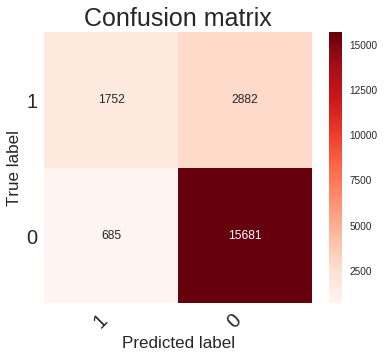

In [ ]:
evaluate_model(y_train, y_train_pred, y_train_pred_prob)

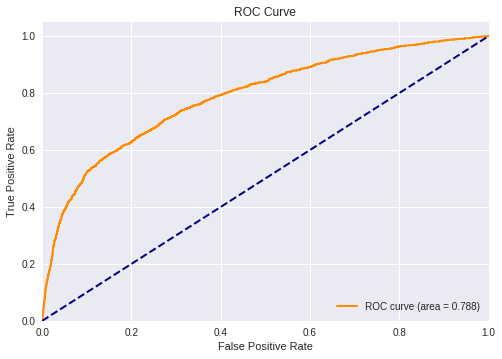

In [ ]:
### START CODE HERE ###
plot_roc(y_test, y_test_pred_prob)
### END CODE HERE ###

## Model Evaluation on test set

0.6655548652547795
Accuracy: 0.826
Precision: 0.701
Recall: 0.377
F1 Score: 0.490
AUC score: 0.788 



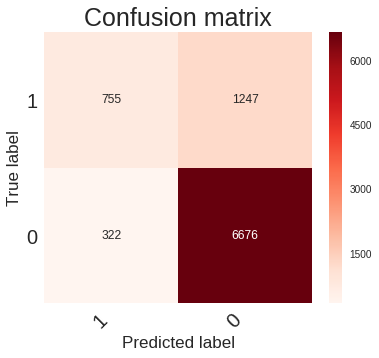

In [ ]:
### START CODE HERE ###
evaluate_model(y_test, y_test_pred, y_test_pred_prob)
### END CODE HERE ###

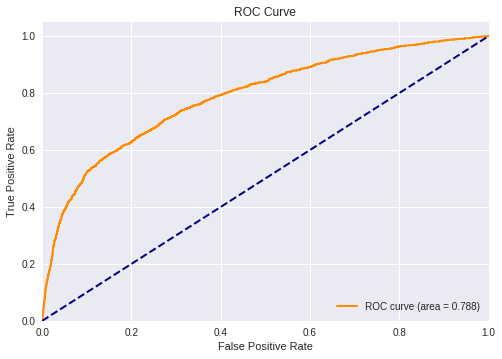

In [ ]:
### START CODE HERE ###
plot_roc(y_test, y_test_pred_prob)
### END CODE HERE ###

## Tuning hyperparameters by Bayesian Optimization and 5-fold cross validation

In [ ]:
import xgboost

xg_train = xgboost.DMatrix(x_train_s, label=y_train)

def xgb_cv(max_depth, subsample, colsample_bytree, min_child_weight, reg_alpha, reg_lambda):


  params = {
    'eta': 0.03,
    'max_depth': int(max_depth),
    'min_child_weight': min_child_weight,
    'reg_alpha': reg_alpha,
    'reg_lambda': reg_lambda,
    'n_estimators': 100,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'objective': 'binary:logistic',
    'seed': RAND_SEED,
    'eval_metric':'auc',
  }

  cv_result = xgboost.cv(params, xg_train, num_boost_round=100, nfold=5, stratified=False)
  return cv_result['test-auc-mean'].iloc[-1]



In [ ]:
from bayes_opt import BayesianOptimization
xgb_bo = BayesianOptimization(xgb_cv, pbounds={'max_depth': (3, 15),
                                        'subsample': (0.1, 0.99),
                                        'colsample_bytree': (0.1, 0.99),
                                        'min_child_weight': (0,20),
                                        'reg_alpha':(0,20),
                                       'reg_lambda':(0,20),
                                      },
                             verbose=2)

In [ ]:
start = datetime.now()

xgb_bo.maximize(init_points=3, n_iter=10)

time_elapsed = datetime.now() - start

print('Time elapsed:',time_elapsed)

|   iter    |  target   | colsam... | max_depth | min_ch... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7656   |  0.1414   |  3.51     |  11.1     |  1.632    |  16.98    |  0.3818   |
|  2        |  0.775    |  0.4597   |  6.831    |  13.56    |  13.32    |  19.68    |  0.7395   |
|  3        |  0.7757   |  0.8695   |  7.457    |  11.05    |  18.41    |  4.598    |  0.5081   |
|  4        |  0.7618   |  0.1      |  15.0     |  3.256e-0 |  20.0     |  20.0     |  0.99     |
|  5        |  0.772    |  0.9285   |  15.0     |  20.0     |  18.59    |  0.7001   |  0.1672   |
|  6        |  0.77     |  0.2907   |  3.251    |  19.29    |  19.3     |  18.95    |  0.6205   |
|  7        |  0.7715   |  0.9614   |  14.43    |  3.277    |  0.4476   |  0.02249  |  0.9026   |
|  8        |  0.7795   |  0.9015   |  14.82    |  19.58    |  0.3536   |  15.92    |  0.8893   |
|  9        |  0.773

In [ ]:
best_res = xgb_bo.max

In [ ]:
#Defining the model and its hyperparameters


xgb = XGBClassifier(
    objective = 'binary:logistic',
    min_child_weight = best_res['params']['min_child_weight'],
    learning_rate = 0.1,
    n_estimators = 100,
    reg_alpha =  best_res['params']['reg_alpha'],
    reg_lambda = best_res['params']['reg_lambda'],
    max_depth = int(best_res['params']['max_depth']),
    colsample_bytree = best_res['params']['colsample_bytree'],
    subsample = best_res['params']['subsample'],
    random_state=RAND_SEED
)



In [ ]:
#Fitting the data to the model

start = datetime.now()


xgb.fit( x_train_s, y_train )


time_elapsed = datetime.now() - start
print('Time elapsed:',time_elapsed)

Time elapsed: 0:00:07.552561


In [ ]:
y_train_pred = xgb.predict(x_train_s)
y_train_pred_prob = xgb.predict_proba(x_train_s)[:,1]

y_test_pred = xgb.predict(x_test_s)
y_test_pred_prob = xgb.predict_proba(x_test_s)[:,1]


Accuracy: 0.823
Precision: 0.683
Recall: 0.386
F1 Score: 0.493
AUC score: 0.788 



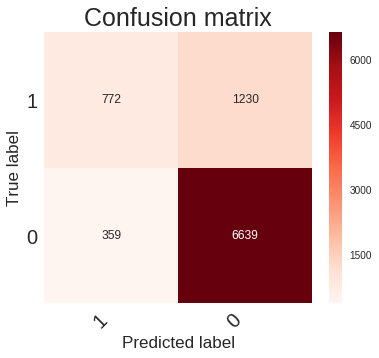

In [ ]:
evaluate_model(y_test, y_test_pred, y_test_pred_prob)


# Tuning hyperparamters by GridSearch and 5-fold cross validation

In [ ]:
xgb = XGBClassifier(
    objective = 'binary:logistic',
    random_state=RAND_SEED
)

# A parameter grid for XGBoost
params = {
    'subsample': [0.1, 0.5, 0.99],
    'colsample_bytree': [0.1, 0.5, 0.99],
    'min_child_weight': [0.1, 10, 20],
    'reg_alpha': [0, 10, 20],
    'reg_lambda': [0, 10, 20],
    'max_depth': [3, 10, 15]
}

grid = GridSearchCV(estimator=xgb, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3 )

In [ ]:
start = datetime.now()

grid.fit(x_train_s, y_train)

time_elapsed = datetime.now() - start

print('Time elapsed:',time_elapsed)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed: 36.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 55.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 80.5min
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed: 109.5min finished


Time elapsed: 1:49:35.443705


In [ ]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=20, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=41, reg_alpha=20, reg_lambda=10, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.99)

In [ ]:
grid.best_params_

{'colsample_bytree': 0.5,
 'max_depth': 10,
 'min_child_weight': 20,
 'reg_alpha': 20,
 'reg_lambda': 10,
 'subsample': 0.99}

In [ ]:
y_train_pred = grid.best_estimator_.predict(x_train_s)
y_train_pred_prob = grid.best_estimator_.predict_proba(x_train_s)[:,1]

y_test_pred = grid.best_estimator_.predict(x_test_s)
y_test_pred_prob = grid.best_estimator_.predict_proba(x_test_s)[:,1]


Accuracy: 0.824
Precision: 0.692
Recall: 0.375
F1 Score: 0.487
AUC score: 0.792 



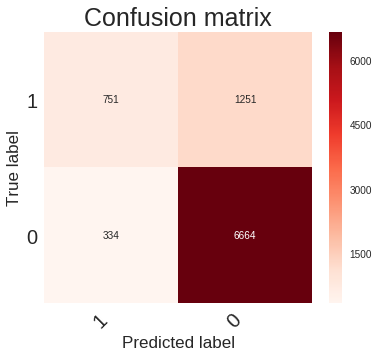

In [ ]:
evaluate_model(y_test, y_test_pred, y_test_pred_prob)

# Plotting and saving the tree graph

Set rankdir to 'UT' for up to down graph or 'LR' for left to right graph

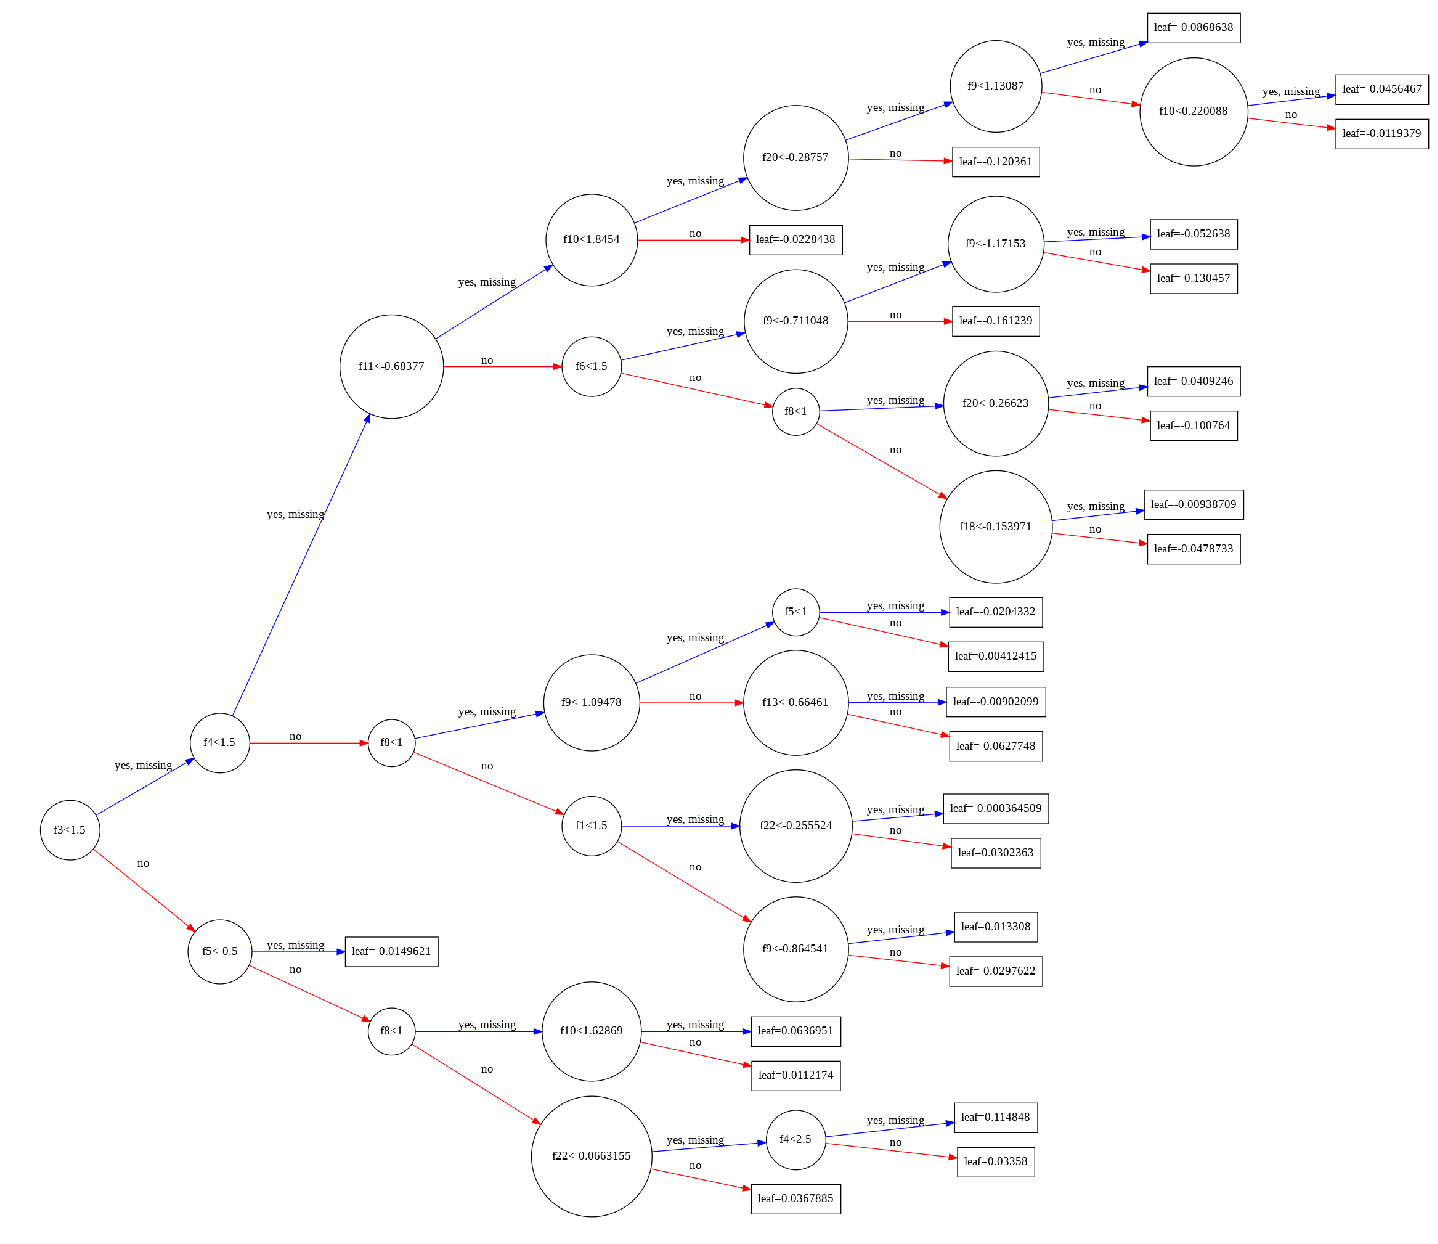

In [ ]:
from xgboost import plot_tree
ax = plt.gca()
ax.figure.set_size_inches(25, 25)
plot_tree(xgb, ax=ax, rankdir='LR')
ax.figure.savefig('xgb.jpg')

# Feature importance

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


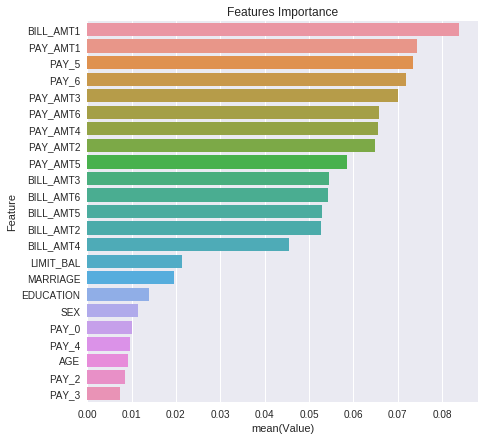

In [ ]:
features = x_train.columns
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,features)), columns=['Value','Feature'])

plt.figure(figsize=(7, 7))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features Importance')
plt.show()

### Question: Can you fit other machine learning models and compare the performance with XGBoost?
Many machine learning models are available in sklearn and can be fitted in a similar manner as in XGBoost (XGBoost is compatible with sklearn).

Popoluar classification models include: Support Vector Machine, Logistic Regression, Linear Discriminant Analysis, AdaBoost (another type of tree ensemble model).

See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model and below code for reference:


**logistic regression**

In [ ]:
#Building a logistic regression classifier

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', random_state=RAND_SEED)

start = datetime.now()
lr.fit(x_train_s, y_train)
time_elapsed = datetime.now() - start
print('Time elapsed:',time_elapsed)

y_test_pred = lr.predict(x_test_s) #Predict class label
y_test_pred_prob = lr.predict_proba(x_test_s)[:,1] #Predict class probability

Time elapsed: 0:00:00.301736


Accuracy: 0.809
Precision: 0.712
Recall: 0.241
F1 Score: 0.360
AUC score: 0.729 



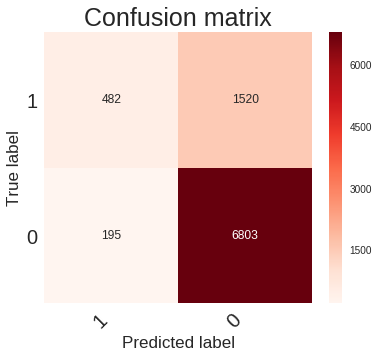

In [ ]:
evaluate_model(y_test, y_test_pred, y_test_pred_prob)

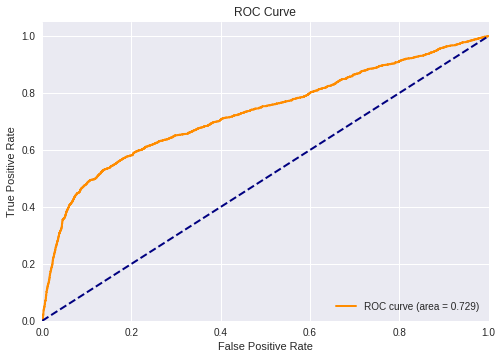

In [ ]:
plot_roc(y_test, y_test_pred_prob)

**Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input


model = Sequential()
model.add(Dense(500,input_dim=23,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['binary_accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 500)               12000     
_________________________________________________________________
dense_34 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_35 (Dense)             (None, 50)                12550     
_________________________________________________________________
dense_36 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 26        
Total params: 151,101
Trainable params: 151,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 100
epoch = 20

model.fit(x_train_s, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.3)

Train on 14699 samples, validate on 6301 samples
Epoch 1/20
14699/14699 [==============================] - 2s 135us/step - loss: 0.5353 - binary_accuracy: 0.7767 - val_loss: 0.4986 - val_binary_accuracy: 0.7777
Epoch 2/20
14699/14699 [==============================] - 1s 83us/step - loss: 0.4783 - binary_accuracy: 0.7939 - val_loss: 0.4749 - val_binary_accuracy: 0.7983
Epoch 3/20
14699/14699 [==============================] - 1s 83us/step - loss: 0.4609 - binary_accuracy: 0.8064 - val_loss: 0.4610 - val_binary_accuracy: 0.8064
Epoch 4/20
14699/14699 [==============================] - 1s 82us/step - loss: 0.4518 - binary_accuracy: 0.8103 - val_loss: 0.4540 - val_binary_accuracy: 0.8078
Epoch 5/20
14699/14699 [==============================] - 1s 81us/step - loss: 0.4473 - binary_accuracy: 0.8125 - val_loss: 0.4500 - val_binary_accuracy: 0.8096
Epoch 6/20
14699/14699 [==============================] - 1s 81us/step - loss: 0.4445 - binary_accuracy: 0.8140 - val_loss: 0.4475 - val_binary_a

In [ ]:
 y_test_pred_prob = model.predict(x_test_s)

In [ ]:
 y_test_pred =  (y_test_pred_prob>=0.5).astype(np.int)

Accuracy: 0.822
Precision: 0.679
Recall: 0.381
F1 Score: 0.488
AUC score: 0.776 



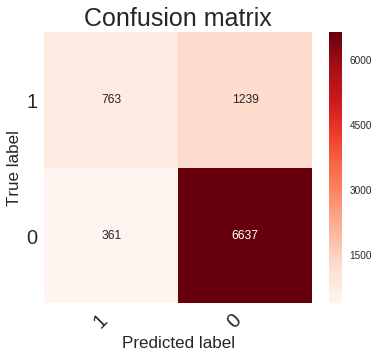

In [ ]:
evaluate_model(y_test, y_test_pred, y_test_pred_prob)

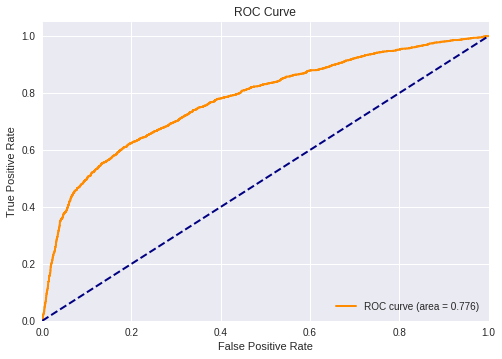

In [ ]:
plot_roc(y_test, y_test_pred_prob)